<a href="https://colab.research.google.com/github/Surya0907/Ai-Bharata-Internship/blob/main/Cat_v_s_Dog_Classification_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the Dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-05-16 04:24:57--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.123.44.196, 2a02:26f0:c900:289::317f, 2a02:26f0:c900:284::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.123.44.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   220MB/s    in 3.6s    

2023-05-16 04:25:01 (221 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Extracting the image files

In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

Check if the device is CPU or GPU

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
print(device)

cuda


In [6]:
from torchvision import models
import torch
 
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [7]:
vgg16 = models.vgg16(weights=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 186MB/s]


In [8]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Exploratory Data Analysis

In [10]:
path = 'PetImages'

for folder in os.listdir(path):
  for img_file in os.listdir(os.path.join(path,folder)):
    img_file = os.path.join(path,folder,img_file)

    try:
      img = Image.open(img_file)
      if img.mode != 'RGB':
        os.remove(img_file)
    except:
      os.remove(img_file)


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Image Augmentation

In [11]:
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

dataset = datasets.ImageFolder('PetImages',transform=transform)
dataset_len = len(dataset)

train_len, test_len = dataset_len-6000,6000
train_set,test_set = torch.utils.data.random_split(dataset,[train_len,test_len])
batch_size = 15


train_set = DataLoader(dataset=train_set, shuffle=True, batch_size=batch_size)
test_set = DataLoader(dataset=test_set, shuffle=True, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using Device:  ',device)

Using Device:   cuda


In [12]:
print(train_len)

18931


In [13]:
print(test_len)

6000


Building CNN

In [14]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model,self).__init__()

    self.pool = nn.MaxPool2d(2,2)
    self.dropout = nn.Dropout(p=0.2)

    self.conv1 = nn.Conv2d( in_channels=3, out_channels=6, kernel_size=4)
    self.conv2 = nn.Conv2d( in_channels=6, out_channels=12, kernel_size=4)
    self.conv3 = nn.Conv2d( in_channels=12, out_channels=14, kernel_size=4)
    self.conv4 = nn.Conv2d( in_channels=14, out_channels=16, kernel_size=4)
    self.conv5 = nn.Conv2d( in_channels=16, out_channels=20, kernel_size=4)


    self.fc1 = nn.Linear( in_features= 20*4*4, out_features=250 )
    self.fc2 = nn.Linear( in_features= 250,    out_features=200 )
    self.fc3 = nn.Linear( in_features= 200,    out_features=50  )
    self.fc4 = nn.Linear( in_features= 50,     out_features=10  )
    self.fc5 = nn.Linear( in_features= 10,     out_features=2   )

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.pool(F.relu(self.conv4(x)))
    x = self.pool(F.relu(self.conv5(x)))

    x = x.reshape(-1,20*4*4)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    x = self.fc5(x)
    return x

net = Model().to(device)



print(net)
    


Model(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(3, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(12, 14, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(14, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv5): Conv2d(16, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=2, bias=True)
)


Defining Parameters for the Model

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)

Training the Model

In [16]:
net.train()

for epoch in range(10):
  total_correct = 0.0
  running_loss = 0.0
  for i, (inputs,labels) in enumerate(train_set):
    inputs,labels = inputs.to(device),labels.to(device)
    
    output = net(inputs)
    output_idx = torch.argmax(output,dim=1)
    total_correct += (labels == output_idx).sum().item()
    optimizer.zero_grad()
    loss = criterion(output,labels)
    running_loss += loss.item() * inputs.size(0)
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch}  Loss: {running_loss/train_len}  Accuracy:{(total_correct/train_len)*100}%')

print('Finished Training')


Epoch: 0  Loss: 0.687059256989997  Accuracy:53.790079763351116%
Epoch: 1  Loss: 0.631610920079618  Accuracy:66.39902804923142%
Epoch: 2  Loss: 0.5872315082071915  Accuracy:70.98938249432149%
Epoch: 3  Loss: 0.5498156602590399  Accuracy:73.86297607099466%
Epoch: 4  Loss: 0.514983581403949  Accuracy:75.63256035074744%
Epoch: 5  Loss: 0.4796488349554272  Accuracy:77.94094342612647%
Epoch: 6  Loss: 0.4486646926233498  Accuracy:79.54677513073794%
Epoch: 7  Loss: 0.4319395849800111  Accuracy:80.96244255454017%
Epoch: 8  Loss: 0.4082762734818576  Accuracy:81.70197031324284%
Epoch: 9  Loss: 0.38421836229076445  Accuracy:83.21800221858328%
Finished Training


Determining Test Accuracy and Loss

In [17]:
with torch.no_grad():
  net.eval()
  total_loss = 0.0
  total_correct = 0.0

  for inputs,labels in test_set:
    labels = labels.to(device)
    outputs = net(inputs.to(device))
    loss = criterion(outputs,labels)
    total_loss += loss.item() * inputs.size(0)
    output_idx = torch.argmax(outputs, dim=1)
    total_correct += sum(labels==output_idx)
  
  print(f'Accuracy : {(total_correct/test_len)*100}%  Loss: {total_loss/ test_len}')


Accuracy : 80.29999542236328%  Loss: 0.42162846082821487


Saving the Model

In [18]:
torch.save(net.state_dict(),'cat_vs_dog.pt')

In [19]:
with torch.no_grad():
  model = Model().to(device)
  model.load_state_dict(torch.load('cat_vs_dog.pt'))
  model.eval()

  total_correct = 0.0

  for inputs,labels in test_set:
    labels = labels.to(device)
    outputs = model(inputs.to(device))
    output_idx = torch.argmax(outputs,dim = 1)
    total_correct += sum(labels==output_idx)
  print(f'Accuracy : {(total_correct/test_len)*100}%')

Accuracy : 80.29999542236328%


Prediction using CNN

In [21]:
img = Image.open('./9994.jpg')
img = transform(img).unsqueeze(dim=0).to(device)
prediction = net(img)
print(torch.argmax(prediction))

tensor(1, device='cuda:0')


Constructing VGG16 Network

In [22]:
class VGG16(nn.Module):
  def __init__(self,num_classes=2):
    super(VGG16,self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(), 
        nn.MaxPool2d(kernel_size = 2, stride = 2))
            
    self.layer3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU())
    
    self.layer4 = nn.Sequential(
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
          
    self.layer5 = nn.Sequential(
         nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(256),
         nn.ReLU())
           
    self.layer6 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU())
            
    
    self.layer7 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
            
    self.layer8 = nn.Sequential(
         nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU())
           
    self.layer9 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU())
            
    
    self.layer10 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size = 2, stride = 2))
           
    self.layer11 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU())
            
    self.layer12 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU())
           
    self.layer13 = nn.Sequential(
         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
         nn.BatchNorm2d(512),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size = 2, stride = 2))
           
    self.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(7*7*512, 4096),
        nn.ReLU())
            
    self.fc1 = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU())
            
    self.fc2= nn.Sequential(
        nn.Linear(4096, num_classes))
            
        
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.layer6(out)
    out = self.layer7(out)
    out = self.layer8(out)
    out = self.layer9(out)
    out = self.layer10(out)
    out = self.layer11(out)
    out = self.layer12(out)
    out = self.layer13(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

In [23]:
num_classes = 2
batch_size = 16
num_epochs = 15
learning_rate = 0.005

model1 = VGG16(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.005)  



total_step = len(train_set)

In [24]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [25]:
total_step = len(train_set)

for epoch in range(num_epochs):
  total_correct = 0.0
  running_loss = 0.0
  for i, (images,labels) in enumerate(train_set):
    images,labels = images.to(device),labels.to(device)
    outputs = model1(images)
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += (labels == output_idx).sum().item()
    optimizer.zero_grad()                                                                                                                                                          
    loss = criterion(outputs,labels)
    running_loss += loss.item() * inputs.size(0)
    loss.backward()
    optimizer.step()
  
  print (f'Epoch {epoch} Loss: {running_loss/train_len} Accuracy:{(total_correct/train_len)*100}%')

Epoch 0 Loss: 0.7007955844734419 Accuracy:49.484971739474936%
Epoch 1 Loss: 0.7012520153292902 Accuracy:49.92868839469653%
Epoch 2 Loss: 0.702791803549753 Accuracy:49.75965347842163%
Epoch 3 Loss: 0.7006329408217633 Accuracy:50.182240769108866%
Epoch 4 Loss: 0.7020603048462012 Accuracy:49.933970735830115%
Epoch 5 Loss: 0.7006205650102846 Accuracy:50.19280545137605%
Epoch 6 Loss: 0.7012035965283493 Accuracy:50.50974591939147%
Epoch 7 Loss: 0.700594411099192 Accuracy:50.11357033437219%
Epoch 8 Loss: 0.7011424570112332 Accuracy:50.0026411705668%
Epoch 9 Loss: 0.7008159416903597 Accuracy:50.06074692303629%
Epoch 10 Loss: 0.6996951915654722 Accuracy:50.27204056837991%
Epoch 11 Loss: 0.7021706149365381 Accuracy:49.881147324494215%
Epoch 12 Loss: 0.701051120174069 Accuracy:50.23506418044478%
Epoch 13 Loss: 0.7016192688395876 Accuracy:49.733241772753686%
Epoch 14 Loss: 0.7000895556333823 Accuracy:50.557286989593784%


In [26]:
with torch.no_grad():
  model1.eval()
  total_loss = 0.0
  total_correct = 0.0

  for images,labels in test_set:
    labels = labels.to(device)
    outputs = model1(images.to(device))
    loss = criterion(outputs,labels)
    total_loss += loss.item() * images.size(0)
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += sum(labels == output_idx)
 
print(f'Accuracy : {(total_correct/test_len)*100}%  Loss: {total_loss/ test_len}')


Accuracy : 51.54999923706055%  Loss: 0.6907439339160919


In [27]:
torch.save(net.state_dict(),'cat_vs_dog_1.pt')


In [28]:
with torch.no_grad():
  model = VGG16().to(device)
  model.load_state_dict(torch.load('cat_vs_dog_1.pt'),strict=False)
  model.eval()

  total_correct = 0.0

  for images,labels in test_set:
    labels = labels.to(device)
    outputs = model(inputs.to(device))
    output_idx = torch.argmax(outputs,dim=1)
    total_correct += sum(labels==output_idx)
  print(f'Accuracy : {(total_correct/test_len)*100}%  ')

Accuracy : 48.58333206176758%  


In [29]:
img = Image.open('./10.jpg')
img = transform(img).unsqueeze(dim=0).to(device)
prediction = net(img)
print(torch.argmax(prediction))

tensor(0, device='cuda:0')


GRAD CAM


In [68]:
import torch
import torchvision
from torchvision import models,transforms
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [69]:
model = models.vgg16(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [82]:
def preprocess_image(image_path):
  img = Image.open(image_path)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])
  img_tensor = preprocess(img).unsqueeze(0)
  return img_tensor

In [90]:
class GradCAM:
  def __init__(self,model):
    self.model = model
    self.gradients = None
    self.model.eval()

  def save_gradient(self,grad):
    self.gradients = grad

  def forward(self,x):
    self.model.zero_grad()
    x.requires_grad_()
    out = self.model(x)
    return out

  def generate_cam(self,image_tensor,target_class):
    output = self.forward(image_tensor)
    one_hot_output = torch.zeros((1, output.size()[-1]), dtype=torch.float)
    one_hot_output[0][target_class] = 1
    output.backward(gradient=one_hot_output)

    gradients = self.gradients.detach().cpu().numpy()
    feature_maps = self.model.feature_maps.detach().cpu().numpy()

    cam_weights = np.mean(gradients, axis=(2, 3))[0, :]
    cam = np.zeros(feature_maps.shape[2:], dtype=np.float32)

    for i, weight in enumerate(cam_weights):
      cam += weight * feature_maps[0, i, :, :]
      
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam = cam - np.min(cam)
    cam = cam / np.max(cam)

    return cam

In [91]:
def register_hooks(model,grad_cam):
  def forward_hook(module,input,output):
    grad_cam.model.feature_maps = output

  def backward_hook(module,grad_input,grad_output):
     grad_cam.save_gradient(grad_output[0])

  for name, module in model.named_modules():
    if isinstance(module, torch.nn.modules.conv.Conv2d):
      target_module = module

  target_module.register_forward_hook(forward_hook)
  target_module.register_backward_hook(backward_hook)

In [92]:
def apply_grad_cam(image_path, model, grad_cam):
  image_tensor = preprocess_image(image_path)

  register_hooks(model,grad_cam)

  with torch.no_grad():
    output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    top_prob, top_class = probabilities.topk(1, dim=1)

  cam = grad_cam.generate_cam(image_tensor, top_class.item())

  original_image = cv2.imread(image_path)
  original_image = cv2.resize(original_image, (224, 224))
  cam_heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
  cam_heatmap = cv2.cvtColor(cam_heatmap, cv2.COLOR_BGR2RGB)
  overlayed_image = cv2.addWeighted(original_image, 0.5, cam_heatmap, 0.5, 0)

  return top_class.item(), top_prob.item(), cam_heatmap, overlayed_image



In [93]:
import urllib

def download_imagenet_labels():
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    urllib.request.urlretrieve(url, "imagenet_classes.txt")


def load_imagenet_labels():
    with open("imagenet_classes.txt", "r") as f:
        labels = [line.strip() for line in f.readlines()]
    return labels

In [94]:
def visualize_results(image_path,model,grad_cam):
  download_imagenet_labels()
  imagenet_labels = load_imagenet_labels()

  top_class, top_prob, cam_heatmap, overlayed_image = apply_grad_cam(image_path,model,grad_cam)
  class_label = imagenet_labels[top_class]

  fig,ax = plt.subplots(1, 3, figsize=(15, 5))

  ax[0].imshow(Image.open(image_path))
  ax[0].axis('off')
  ax[0].set_title('Original Image')

  ax[1].imshow(cam_heatmap)
  ax[1].axis('off')
  ax[1].set_title('Grad-CAM Heatmap')

  ax[2].imshow(overlayed_image)
  ax[2].axis('off')
  ax[2].set_title(f'Overlayed Image (Class: {class_label}, Prob: {top_prob:.4f})')

  plt.show()


In [97]:
!wget "https://inspirationseek.com/wp-content/uploads/2016/02/Cute-Dog-Bring-Yellow-Rose-1024x768.jpg" -O "dog.jpg"
!wget "http://images6.fanpop.com/image/photos/39000000/Cat-cats-39082303-1680-1050.jpg" -O "cat.jpg"
!wget "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-together-cover.jpg" -O "cats_and_dogs.jpg"

--2023-05-16 08:36:37--  https://inspirationseek.com/wp-content/uploads/2016/02/Cute-Dog-Bring-Yellow-Rose-1024x768.jpg
Resolving inspirationseek.com (inspirationseek.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to inspirationseek.com (inspirationseek.com)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpg]
Saving to: ‘dog.jpg’

dog.jpg                 [  <=>               ] 142.78K   531KB/s    in 0.3s    

2023-05-16 08:36:37 (531 KB/s) - ‘dog.jpg’ saved [146208]

--2023-05-16 08:36:38--  http://images6.fanpop.com/image/photos/39000000/Cat-cats-39082303-1680-1050.jpg
Resolving images6.fanpop.com (images6.fanpop.com)... 172.67.73.155, 104.26.10.178, 104.26.11.178
Connecting to images6.fanpop.com (images6.fanpop.com)|172.67.73.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683600 (668K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 667.58K

Test Grad-CAM

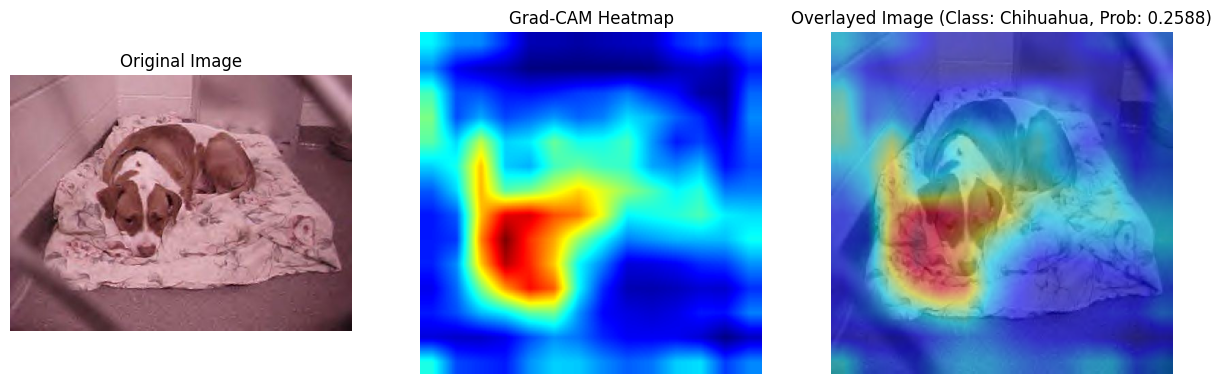

In [102]:
image_path = '9994.jpg'
grad_cam = GradCAM(model)
visualize_results(image_path, model, grad_cam)